# MACHINE LEARNING PROJECT

# HOUSING PRICE PREDICTION 
 NAME- SACHIN BALU MORE

# Import data

In [1]:
from warnings import filterwarnings
filterwarnings("ignore")
import pandas as pd
import os
os.chdir("D:/python/project/")

In [2]:
train=pd.read_csv("training_set.csv")

In [3]:
train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


# Drop Unnecessary columns

In [4]:
for i in train.columns:
    print(i,len(train[i].unique()))

Id 1460
MSSubClass 15
MSZoning 5
LotFrontage 111
LotArea 1073
Street 2
Alley 3
LotShape 4
LandContour 4
Utilities 2
LotConfig 5
LandSlope 3
Neighborhood 25
Condition1 9
Condition2 8
BldgType 5
HouseStyle 8
OverallQual 10
OverallCond 9
YearBuilt 112
YearRemodAdd 61
RoofStyle 6
RoofMatl 8
Exterior1st 15
Exterior2nd 16
MasVnrType 5
MasVnrArea 328
ExterQual 4
ExterCond 5
Foundation 6
BsmtQual 5
BsmtCond 5
BsmtExposure 5
BsmtFinType1 7
BsmtFinSF1 637
BsmtFinType2 7
BsmtFinSF2 144
BsmtUnfSF 780
TotalBsmtSF 721
Heating 6
HeatingQC 5
CentralAir 2
Electrical 6
1stFlrSF 753
2ndFlrSF 417
LowQualFinSF 24
GrLivArea 861
BsmtFullBath 4
BsmtHalfBath 3
FullBath 4
HalfBath 3
BedroomAbvGr 8
KitchenAbvGr 4
KitchenQual 4
TotRmsAbvGrd 12
Functional 7
Fireplaces 4
FireplaceQu 6
GarageType 7
GarageYrBlt 98
GarageFinish 4
GarageCars 5
GarageArea 441
GarageQual 6
GarageCond 6
PavedDrive 3
WoodDeckSF 274
OpenPorchSF 202
EnclosedPorch 120
3SsnPorch 20
ScreenPorch 76
PoolArea 8
PoolQC 4
Fence 5
MiscFeature 5
MiscV

In [5]:
train = train.drop("Id",axis=1)

In [6]:
train.isna().sum()

MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
Street             0
                ... 
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
SalePrice          0
Length: 80, dtype: int64

# Find and replace Missing Data

In [7]:
from preprocessing_6PM import replacer
replacer(train)

In [8]:
train.isna().sum()

MSSubClass       0
MSZoning         0
LotFrontage      0
LotArea          0
Street           0
                ..
MoSold           0
YrSold           0
SaleType         0
SaleCondition    0
SalePrice        0
Length: 80, dtype: int64

# Define X and Y

In [9]:
train.columns

Index(['MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street', 'Alley',
       'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope',
       'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle',
       'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle',
       'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea',
       'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC',
       'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd',
       'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageYrBlt',
       'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond',
       'PavedDrive', 'Wo

In [10]:
Y=train[["SalePrice"]]
X=train.drop(labels=["SalePrice"],axis=1)

# Seperate categorical and contionues columns

In [11]:
cat=[]
con=[]
for i in X.columns:
    if (X[i].dtypes=="object"):
        cat.append(i)
    else:
        con.append(i)

In [12]:
#cat

In [13]:
#con

In [14]:
X.skew()

MSSubClass        1.407657
LotFrontage       2.384950
LotArea          12.207688
OverallQual       0.216944
OverallCond       0.693067
YearBuilt        -0.613461
YearRemodAdd     -0.503562
MasVnrArea        2.676412
BsmtFinSF1        1.685503
BsmtFinSF2        4.255261
BsmtUnfSF         0.920268
TotalBsmtSF       1.524255
1stFlrSF          1.376757
2ndFlrSF          0.813030
LowQualFinSF      9.011341
GrLivArea         1.366560
BsmtFullBath      0.596067
BsmtHalfBath      4.103403
FullBath          0.036562
HalfBath          0.675897
BedroomAbvGr      0.211790
KitchenAbvGr      4.488397
TotRmsAbvGrd      0.676341
Fireplaces        0.649565
GarageYrBlt      -0.668175
GarageCars       -0.342549
GarageArea        0.179981
WoodDeckSF        1.541376
OpenPorchSF       2.364342
EnclosedPorch     3.089872
3SsnPorch        10.304342
ScreenPorch       4.122214
PoolArea         14.828374
MiscVal          24.476794
MoSold            0.212053
YrSold            0.096269
dtype: float64

In [15]:
X.skew().sort_values() > 0.7

GarageYrBlt      False
YearBuilt        False
YearRemodAdd     False
GarageCars       False
FullBath         False
YrSold           False
GarageArea       False
BedroomAbvGr     False
MoSold           False
OverallQual      False
BsmtFullBath     False
Fireplaces       False
HalfBath         False
TotRmsAbvGrd     False
OverallCond      False
2ndFlrSF          True
BsmtUnfSF         True
GrLivArea         True
1stFlrSF          True
MSSubClass        True
TotalBsmtSF       True
WoodDeckSF        True
BsmtFinSF1        True
OpenPorchSF       True
LotFrontage       True
MasVnrArea        True
EnclosedPorch     True
BsmtHalfBath      True
ScreenPorch       True
BsmtFinSF2        True
KitchenAbvGr      True
LowQualFinSF      True
3SsnPorch         True
LotArea           True
PoolArea          True
MiscVal           True
dtype: bool

In [16]:
cols_with_skew = ["2ndFlrSF","BsmtUnfSF","GrLivArea","1stFlrSF","MSSubClass","TotalBsmtSF","WoodDeckSF","BsmtFinSF1","OpenPorchSF","LotFrontage","MasVnrArea","EnclosedPorch","BsmtHalfBath","ScreenPorch","BsmtFinSF2","KitchenAbvGr","LowQualFinSF","3SsnPorch","LotArea","PoolArea","MiscVal"]

In [17]:
cols_with_skew

['2ndFlrSF',
 'BsmtUnfSF',
 'GrLivArea',
 '1stFlrSF',
 'MSSubClass',
 'TotalBsmtSF',
 'WoodDeckSF',
 'BsmtFinSF1',
 'OpenPorchSF',
 'LotFrontage',
 'MasVnrArea',
 'EnclosedPorch',
 'BsmtHalfBath',
 'ScreenPorch',
 'BsmtFinSF2',
 'KitchenAbvGr',
 'LowQualFinSF',
 '3SsnPorch',
 'LotArea',
 'PoolArea',
 'MiscVal']

# Bivariate

<AxesSubplot:>

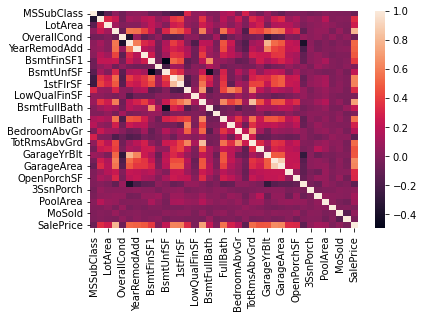

In [18]:
import seaborn as sb
sb.heatmap(train.corr())

In [19]:
imp_cols = list(train.corr()["SalePrice"].sort_values().index)[22:]
imp_cols.remove("SalePrice")

<AxesSubplot:>

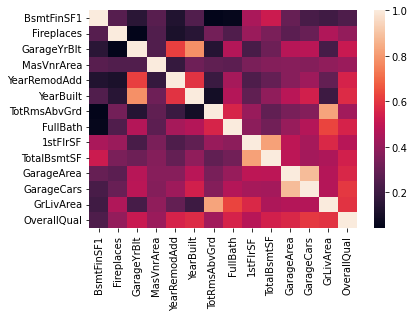

In [20]:
sb.heatmap(X[imp_cols].corr())

# Data preparation

In [21]:
X1 = pd.get_dummies(X[cat])
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
X2 = pd.DataFrame(ss.fit_transform(X[imp_cols]),columns=imp_cols)
X = X2.join(X1)

# OLS model

In [22]:
X = X.drop(['GrLivArea', 'BsmtFinSF1', 'OverallQual', 'YearRemodAdd', 'MasVnrArea'],axis=1)

In [23]:
from statsmodels.api import add_constant,OLS
X1 = add_constant(X)
ols = OLS(Y,X1)
model = ols.fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.907
Model:                            OLS   Adj. R-squared:                  0.891
Method:                 Least Squares   F-statistic:                     55.84
Date:                Tue, 08 Feb 2022   Prob (F-statistic):               0.00
Time:                        19:33:49   Log-Likelihood:                -16810.
No. Observations:                1460   AIC:                         3.406e+04
Df Residuals:                    1242   BIC:                         3.521e+04
Df Model:                         217                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                  1.383e+04   2825.175      4.895      0.000    8287.794    1.94e+04
Fireplaces             4555.9032   1103.878      4.127      0.000    2390.231    6721.576
GarageYrBlt           -1429.4155   1518.316     -0.941      0.347   -4408.164    1549.333
YearBuilt              5324.4939   2457.116      2.167      0.030     503.938    1.01e+04
TotRmsAbvGrd           6405.1121   1480.792      4.325      0.000    3499.983    9310.242
FullBath               4095.1929   1209.863      3.385      0.001    1721.592    6468.794
1stFlrSF               1.735e+04   2234.869      7.761      0.000     1.3e+04    2.17e+04
TotalBsmtSF            7591.6972   1940.746      3.912      0.000    3784.194    1.14e+04
GarageArea             6393.2066   1883.705      3.394      0.001    2697.612    1.01e+04
GarageCars             2128.4762   1877.214      1.134      0.257   -1554.384    5811.336
MSZoning_C (all)      -3.578e+04   9176.634     -3.900      0.000   -5.38e+04   -1.78e+04
MSZoning_FV            1.848e+04   6812.143      2.713      0.007    5118.572    3.18e+04
MSZoning_RH            1.372e+04   6764.466      2.029      0.043     452.297     2.7e+04
MSZoning_RL            1.035e+04   3598.940      2.875      0.004    3285.499    1.74e+04
MSZoning_RM            7062.5015   4074.791      1.733      0.083    -931.733    1.51e+04
Street_Grvl            1223.6333   7127.780      0.172      0.864   -1.28e+04    1.52e+04
Street_Pave            1.261e+04   6557.310      1.923      0.055    -257.825    2.55e+04
Alley_Grvl             2865.8363   2962.446      0.967      0.334   -2946.116    8677.788
Alley_Pave             1.096e+04   3124.767      3.509      0.000    4834.196    1.71e+04
LotShape_IR1          -2895.8012   2957.101     -0.979      0.328   -8697.267    2905.664
LotShape_IR2           4014.3320   4263.580      0.942      0.347   -4350.282    1.24e+04
LotShape_IR3           1.451e+04   7419.914      1.956      0.051     -42.222    2.91e+04
LotShape_Reg          -1802.8211   3058.078     -0.590      0.556   -7802.391    4196.749
LandContour_Bnk         530.4429   3570.316      0.149      0.882   -6474.074    7534.960
LandContour_HLS        8583.4941   3675.164      2.336      0.020    1373.279    1.58e+04
LandContour_Low       -1737.1116   4690.638     -0.370      0.711   -1.09e+04    7465.338
LandContour_Lvl        6453.6112   2663.650      2.423      0.016    1227.860    1.17e+04
Utilities_AllPub       2.171e+04   1.39e+04      1.557      0.120   -5651.625    4.91e+04
Utilities_NoSeWa      -7881.7117   1.53e+04     -0.516      0.606   -3.79e+04    2.21e+04
LotConfig_Corner       7380.5390   3401.033      2.170      0.030     708.134    1.41e+04
LotConfig_CulDSac      1.584e+04   4003.508      3.957      0.000    7988.899    2.37e+04
LotConfig_FR2         -

In [24]:
model.pvalues.sort_values().index

Index(['RoofMatl_ClyTile', 'Neighborhood_NoRidge', 'BsmtExposure_Gd',
       'RoofMatl_WdShngl', 'BldgType_1Fam', 'KitchenQual_Ex', '1stFlrSF',
       'Neighborhood_StoneBr', 'BsmtQual_Ex', 'Condition2_PosN',
       ...
       'Functional_Maj1', 'Exterior2nd_Other', 'Heating_Floor',
       'RoofStyle_Mansard', 'Condition2_Artery', 'BldgType_TwnhsE',
       'PavedDrive_P', 'Condition1_RRNe', 'HouseStyle_1.5Unf',
       'Exterior1st_AsphShn'],
      dtype='object', length=262)

In [25]:
Q = pd.DataFrame(model.pvalues,columns=["Pval"])
M = []
for i in Q.Pval:
    M.append(round(i,3))

Q.Pval = M
Q[Q.Pval > 0.9].index

Index(['Condition1_RRNe', 'Condition2_Artery', 'BldgType_TwnhsE',
       'HouseStyle_1.5Unf', 'RoofStyle_Mansard', 'Exterior1st_AsphShn',
       'Exterior2nd_Other', 'Heating_Floor', 'PavedDrive_P'],
      dtype='object')

In [26]:
Q[Q.Pval > 0.9]

,Pval
Condition1_RRNe,0.961
Condition2_Artery,0.949
BldgType_TwnhsE,0.951
HouseStyle_1.5Unf,0.962
RoofStyle_Mansard,0.945
Exterior1st_AsphShn,0.973
Exterior2nd_Other,0.938
Heating_Floor,0.943
PavedDrive_P,0.958


# deleting the higher Pval columns

In [27]:
X = X.drop(['Condition1_RRNe', 'Condition2_Artery', 'BldgType_TwnhsE','HouseStyle_1.5Unf', 'RoofStyle_Mansard', 'Exterior1st_AsphShn', 'Exterior2nd_Other','Heating_Floor','PavedDrive_P'],axis=1)
from statsmodels.api import add_constant,OLS
X1 = add_constant(X)
ols = OLS(Y,X1)
model = ols.fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.907
Model:                            OLS   Adj. R-squared:                  0.891
Method:                 Least Squares   F-statistic:                     55.84
Date:                Tue, 08 Feb 2022   Prob (F-statistic):               0.00
Time:                        19:33:50   Log-Likelihood:                -16810.
No. Observations:                1460   AIC:                         3.406e+04
Df Residuals:                    1242   BIC:                         3.521e+04
Df Model:                         217                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                  1.315e+04   7634.461      1.723      0.085   -1827.260    2.81e+04
Fireplaces             4555.9032   1103.878      4.127      0.000    2390.231    6721.576
GarageYrBlt           -1429.4155   1518.316     -0.941      0.347   -4408.164    1549.333
YearBuilt              5324.4939   2457.116      2.167      0.030     503.938    1.01e+04
TotRmsAbvGrd           6405.1121   1480.792      4.325      0.000    3499.983    9310.242
FullBath               4095.1929   1209.863      3.385      0.001    1721.592    6468.794
1stFlrSF               1.735e+04   2234.869      7.761      0.000     1.3e+04    2.17e+04
TotalBsmtSF            7591.6972   1940.746      3.912      0.000    3784.194    1.14e+04
GarageArea             6393.2066   1883.705      3.394      0.001    2697.612    1.01e+04
GarageCars             2128.4762   1877.214      1.134      0.257   -1554.384    5811.336
MSZoning_C (all)      -3.592e+04   9295.565     -3.864      0.000   -5.42e+04   -1.77e+04
MSZoning_FV            1.835e+04   6933.666      2.646      0.008    4744.192     3.2e+04
MSZoning_RH            1.359e+04   6936.773      1.959      0.050     -21.713    2.72e+04
MSZoning_RL            1.021e+04   3837.445      2.661      0.008    2681.617    1.77e+04
MSZoning_RM            6926.5352   4320.049      1.603      0.109   -1548.864    1.54e+04
Street_Grvl             883.7176   8022.312      0.110      0.912   -1.49e+04    1.66e+04
Street_Pave            1.227e+04   7389.030      1.660      0.097   -2229.472    2.68e+04
Alley_Grvl             2525.9206   4600.975      0.549      0.583   -6500.621    1.16e+04
Alley_Pave             1.062e+04   4745.838      2.239      0.025    1313.939    1.99e+04
LotShape_IR1          -3065.7590   3424.894     -0.895      0.371   -9784.976    3653.457
LotShape_IR2           3844.3741   4633.801      0.830      0.407   -5246.567    1.29e+04
LotShape_IR3           1.434e+04   7614.486      1.884      0.060    -593.906    2.93e+04
LotShape_Reg          -1972.7789   3566.927     -0.553      0.580   -8970.648    5025.090
LandContour_Bnk         360.4851   3956.869      0.091      0.927   -7402.401    8123.371
LandContour_HLS        8413.5363   4120.601      2.042      0.041     329.429    1.65e+04
LandContour_Low       -1907.0695   5002.440     -0.381      0.703   -1.17e+04    7907.096
LandContour_Lvl        6283.6534   3204.120      1.961      0.050      -2.432    1.26e+04
Utilities_AllPub       2.137e+04   1.43e+04      1.491      0.136   -6743.622    4.95e+04
Utilities_NoSeWa      -8221.6273   1.57e+04     -0.522      0.602   -3.91e+04    2.27e+04
LotConfig_Corner       7244.5727   3637.176      1.992      0.047     108.884    1.44e+04
LotConfig_CulDSac      1.571e+04   4218.429      3.724      0.000    7431.286     2.4e+04
LotConfig_FR2         -

In [28]:
Q = pd.DataFrame(model.pvalues,columns=["Pval"])
M = []
for i in Q.Pval:
    M.append(round(i,3))

Q.Pval = M
Q[Q.Pval > 0.9].index

Index(['Street_Grvl', 'LandContour_Bnk', 'RoofStyle_Flat',
       'Exterior1st_AsbShng', 'Exterior1st_Plywood', 'Exterior1st_Stone',
       'Exterior2nd_AsbShng', 'Exterior2nd_MetalSd', 'Exterior2nd_Stucco',
       'Heating_GasA', 'Heating_Grav', 'Functional_Maj1'],
      dtype='object')

In [29]:
Q[Q.Pval > 0.9]

,Pval
Street_Grvl,0.912
LandContour_Bnk,0.927
RoofStyle_Flat,0.920
Exterior1st_AsbShng,0.903
Exterior1st_Plywood,0.911
Exterior1st_Stone,0.952
Exterior2nd_AsbShng,0.993
Exterior2nd_MetalSd,0.965
Exterior2nd_Stucco,0.951
Heating_GasA,0.911


In [30]:
X = X.drop(['LandContour_Bnk', 'RoofStyle_Flat', 'Exterior1st_AsbShng','Exterior1st_Plywood', 'Exterior1st_Stone', 'Exterior2nd_MetalSd'],axis=1)
from statsmodels.api import add_constant,OLS
X1 = add_constant(X)
ols = OLS(Y,X1)
model = ols.fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.907
Model:                            OLS   Adj. R-squared:                  0.891
Method:                 Least Squares   F-statistic:                     57.37
Date:                Tue, 08 Feb 2022   Prob (F-statistic):               0.00
Time:                        19:33:52   Log-Likelihood:                -16810.
No. Observations:                1460   AIC:                         3.405e+04
Df Residuals:                    1247   BIC:                         3.517e+04
Df Model:                         212                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                  1.296e+04   5732.297      2.262      0.024    1718.819    2.42e+04
Fireplaces             4562.6011   1101.462      4.142      0.000    2401.679    6723.523
GarageYrBlt           -1402.7447   1512.461     -0.927      0.354   -4369.994    1564.504
YearBuilt              5378.1384   2449.709      2.195      0.028     572.132    1.02e+04
TotRmsAbvGrd           6359.0156   1474.603      4.312      0.000    3466.038    9251.993
FullBath               4072.1224   1204.510      3.381      0.001    1709.032    6435.213
1stFlrSF               1.744e+04   2183.155      7.989      0.000    1.32e+04    2.17e+04
TotalBsmtSF            7471.6285   1893.763      3.945      0.000    3756.315    1.12e+04
GarageArea             6365.6607   1877.623      3.390      0.001    2682.011       1e+04
GarageCars             2160.8671   1871.757      1.154      0.249   -1511.273    5833.007
MSZoning_C (all)      -3.587e+04   9237.929     -3.883      0.000    -5.4e+04   -1.77e+04
MSZoning_FV            1.841e+04   6838.037      2.692      0.007    4992.171    3.18e+04
MSZoning_RH            1.325e+04   6809.432      1.946      0.052    -107.296    2.66e+04
MSZoning_RL            1.026e+04   3684.088      2.786      0.005    3036.176    1.75e+04
MSZoning_RM            6914.5155   4210.761      1.642      0.101   -1346.442    1.52e+04
Street_Grvl             744.4986   7590.183      0.098      0.922   -1.41e+04    1.56e+04
Street_Pave            1.222e+04   6945.787      1.759      0.079   -1406.387    2.58e+04
Alley_Grvl             2425.5900   3775.089      0.643      0.521   -4980.637    9831.817
Alley_Pave             1.054e+04   4078.733      2.584      0.010    2537.304    1.85e+04
LotShape_IR1          -3004.9526   3181.152     -0.945      0.345   -9245.954    3236.049
LotShape_IR2           3914.8206   4424.968      0.885      0.376   -4766.383    1.26e+04
LotShape_IR3           1.398e+04   7480.987      1.868      0.062    -699.195    2.87e+04
LotShape_Reg          -1922.5529   3315.291     -0.580      0.562   -8426.716    4581.610
LandContour_HLS        8181.8167   5824.509      1.405      0.160   -3245.103    1.96e+04
LandContour_Low       -2090.3214   7072.865     -0.296      0.768    -1.6e+04    1.18e+04
LandContour_Lvl        6053.0215   4201.213      1.441      0.150   -2189.205    1.43e+04
Utilities_AllPub       2.128e+04    1.4e+04      1.518      0.129   -6230.514    4.88e+04
Utilities_NoSeWa      -8316.8666   1.55e+04     -0.535      0.592   -3.88e+04    2.22e+04
LotConfig_Corner       7251.6267   3482.520      2.082      0.038     419.382    1.41e+04
LotConfig_CulDSac      1.573e+04   4071.938      3.864      0.000    7744.817    2.37e+04
LotConfig_FR2         -4202.5475   4517.202     -0.930      0.352   -1.31e+04    4659.608
LotConfig_FR3         -

In [31]:
Q = pd.DataFrame(model.pvalues,columns=["Pval"])
M = []
for i in Q.Pval:
    M.append(round(i,3))

Q.Pval = M
E = list(Q[Q.Pval > 0.4].index)

In [33]:
X = X.drop(E,axis=1)
from statsmodels.api import add_constant,OLS
X1 = add_constant(X)
ols = OLS(Y,X1)
model = ols.fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.903
Model:                            OLS   Adj. R-squared:                  0.892
Method:                 Least Squares   F-statistic:                     81.81
Date:                Tue, 08 Feb 2022   Prob (F-statistic):               0.00
Time:                        19:40:38   Log-Likelihood:                -16841.
No. Observations:                1460   AIC:                         3.398e+04
Df Residuals:                    1310   BIC:                         3.478e+04
Df Model:                         149                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                  8443.2747   1.51e+04      0.559      0.577   -2.12e+04    3.81e+04
Fireplaces             4377.5976   1064.024      4.114      0.000    2290.220    6464.975
GarageYrBlt           -1645.9617   1439.372     -1.144      0.253   -4469.687    1177.764
YearBuilt              4943.7316   2078.396      2.379      0.018     866.384    9021.079
TotRmsAbvGrd           6388.4725   1396.022      4.576      0.000    3649.788    9127.157
FullBath               4331.4411   1163.652      3.722      0.000    2048.616    6614.266
1stFlrSF               1.735e+04   2009.858      8.631      0.000    1.34e+04    2.13e+04
TotalBsmtSF            7153.8437   1559.336      4.588      0.000    4094.775    1.02e+04
GarageArea             6420.0696   1819.274      3.529      0.000    2851.062    9989.078
GarageCars             2170.0178   1823.992      1.190      0.234   -1408.247    5748.283
MSZoning_C (all)      -3.408e+04   9000.661     -3.786      0.000   -5.17e+04   -1.64e+04
MSZoning_FV            1.986e+04   5375.199      3.694      0.000    9311.298    3.04e+04
MSZoning_RH            1.037e+04   7040.303      1.473      0.141   -3442.594    2.42e+04
MSZoning_RL            8120.1371   4467.785      1.817      0.069    -644.659    1.69e+04
MSZoning_RM            4177.7376   4526.029      0.923      0.356   -4701.319    1.31e+04
Street_Pave            7230.7575   1.25e+04      0.580      0.562   -1.72e+04    3.17e+04
Alley_Pave             9156.6729   5114.409      1.790      0.074    -876.656    1.92e+04
LotShape_IR1           -693.6059   1783.988     -0.389      0.697   -4193.391    2806.179
LotShape_IR2           5532.6361   4759.050      1.163      0.245   -3803.556    1.49e+04
LotShape_IR3           1.503e+04   9255.355      1.624      0.105   -3128.829    3.32e+04
LandContour_HLS        8312.8337   5102.014      1.629      0.103   -1696.178    1.83e+04
LandContour_Lvl        5661.2097   3542.699      1.598      0.110   -1288.775    1.26e+04
Utilities_AllPub       2.885e+04   2.84e+04      1.017      0.309   -2.68e+04    8.45e+04
LotConfig_Corner       1.627e+04    1.4e+04      1.164      0.245   -1.12e+04    4.37e+04
LotConfig_CulDSac      2.453e+04   1.43e+04      1.717      0.086   -3492.869    5.26e+04
LotConfig_FR2          3710.0402   1.44e+04      0.258      0.797   -2.45e+04    3.19e+04
LotConfig_Inside       1.347e+04   1.39e+04      0.971      0.331   -1.37e+04    4.07e+04
LandSlope_Mod          6970.0205   4198.931      1.660      0.097   -1267.344    1.52e+04
Neighborhood_Blmngtn  -6810.3707   7906.136     -0.861      0.389   -2.23e+04    8699.701
Neighborhood_ClearCr  -4293.4060   6424.101     -0.668      0.504   -1.69e+04    8309.244
Neighborhood_CollgCr  -3350.7437   3628.376     -0.923      0.356   -1.05e+04    3767.319
Neighborhood_Crawfor   

In [35]:
X.columns

Index(['Fireplaces', 'GarageYrBlt', 'YearBuilt', 'TotRmsAbvGrd', 'FullBath',
       '1stFlrSF', 'TotalBsmtSF', 'GarageArea', 'GarageCars',
       'MSZoning_C (all)',
       ...
       'Fence_MnPrv', 'MiscFeature_Gar2', 'SaleType_COD', 'SaleType_New',
       'SaleType_WD', 'SaleCondition_AdjLand', 'SaleCondition_Alloca',
       'SaleCondition_Family', 'SaleCondition_Normal',
       'SaleCondition_Partial'],
      dtype='object', length=156)

# Divide the data in training and testing set

In [36]:
from sklearn.model_selection import train_test_split,GridSearchCV
xtrain,xtest,ytrain,ytest=train_test_split(X,Y,test_size=0.2,random_state=31)

In [37]:
x = 0.95
for i in range(0,30):
    from sklearn.linear_model import Ridge
    rr = Ridge(alpha=x)
    model = rr.fit(xtrain,ytrain)
    tr_pred = model.predict(xtrain)
    ts_pred = model.predict(xtest)
    from sklearn.metrics import mean_absolute_error
    tr_err = round(mean_absolute_error(ytrain,tr_pred),2)
    ts_err = round(mean_absolute_error(ytest,ts_pred),2)
    print("===============",x,"=============")
    print("Training Error: ",tr_err)
    print("Testing Error: ",ts_err)
    if(tr_err < ts_err):
        print("Overfitting")
    
    x = x + 0.00005

=============== 0.95 =============
Training Error:  16700.96
Testing Error:  21312.39
Overfitting
=============== 0.95005 =============
Training Error:  16700.99
Testing Error:  21312.39
Overfitting
=============== 0.9501 =============
Training Error:  16701.01
Testing Error:  21312.39
Overfitting
=============== 0.9501499999999999 =============
Training Error:  16701.03
Testing Error:  21312.39
Overfitting
=============== 0.9501999999999999 =============
Training Error:  16701.05
Testing Error:  21312.39
Overfitting
=============== 0.9502499999999999 =============
Training Error:  16701.08
Testing Error:  21312.39
Overfitting
=============== 0.9502999999999999 =============
Training Error:  16701.1
Testing Error:  21312.38
Overfitting
=============== 0.9503499999999999 =============
Training Error:  16701.12
Testing Error:  21312.38
Overfitting
=============== 0.9503999999999999 =============
Training Error:  16701.14
Testing Error:  21312.38
Overfitting
=============== 0.950449999999

In [38]:
x = 1
for i in range(0,30):
    from sklearn.linear_model import Lasso
    rr = Lasso(alpha=x)
    model = rr.fit(xtrain,ytrain)
    tr_pred = model.predict(xtrain)
    ts_pred = model.predict(xtest)
    from sklearn.metrics import mean_absolute_error
    tr_err = round(mean_absolute_error(ytrain,tr_pred),2)
    ts_err = round(mean_absolute_error(ytest,ts_pred),2)
    print("===============",x,"=============")
    print("Training Error: ",tr_err)
    print("Testing Error: ",ts_err)
    if(tr_err < ts_err):
        print("Overfitting")
    
    x = x + 0.05

=============== 1 =============
Training Error:  16079.81
Testing Error:  21153.49
Overfitting
=============== 1.05 =============
Training Error:  16080.43
Testing Error:  21152.17
Overfitting
=============== 1.1 =============
Training Error:  16081.07
Testing Error:  21150.84
Overfitting
=============== 1.1500000000000001 =============
Training Error:  16081.75
Testing Error:  21149.5
Overfitting
=============== 1.2000000000000002 =============
Training Error:  16082.42
Testing Error:  21148.16
Overfitting
=============== 1.2500000000000002 =============
Training Error:  16083.1
Testing Error:  21146.81
Overfitting
=============== 1.3000000000000003 =============
Training Error:  16083.77
Testing Error:  21145.48
Overfitting
=============== 1.3500000000000003 =============
Training Error:  16084.44
Testing Error:  21144.16
Overfitting
=============== 1.4000000000000004 =============
Training Error:  16085.14
Testing Error:  21142.86
Overfitting
=============== 1.4500000000000004 =====

# import test file

In [39]:
test=pd.read_csv("testing_set.csv")

In [40]:
test.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [42]:
test.isna().sum()

Id                 0
MSSubClass         0
MSZoning           4
LotFrontage      227
LotArea            0
                ... 
MiscVal            0
MoSold             0
YrSold             0
SaleType           1
SaleCondition      0
Length: 80, dtype: int64

In [43]:
replacer(test)

In [45]:
cols_keep = list(xtrain.columns)

In [46]:
cols_keep

['Fireplaces',
 'GarageYrBlt',
 'YearBuilt',
 'TotRmsAbvGrd',
 'FullBath',
 '1stFlrSF',
 'TotalBsmtSF',
 'GarageArea',
 'GarageCars',
 'MSZoning_C (all)',
 'MSZoning_FV',
 'MSZoning_RH',
 'MSZoning_RL',
 'MSZoning_RM',
 'Street_Pave',
 'Alley_Pave',
 'LotShape_IR1',
 'LotShape_IR2',
 'LotShape_IR3',
 'LandContour_HLS',
 'LandContour_Lvl',
 'Utilities_AllPub',
 'LotConfig_Corner',
 'LotConfig_CulDSac',
 'LotConfig_FR2',
 'LotConfig_Inside',
 'LandSlope_Mod',
 'Neighborhood_Blmngtn',
 'Neighborhood_ClearCr',
 'Neighborhood_CollgCr',
 'Neighborhood_Crawfor',
 'Neighborhood_Edwards',
 'Neighborhood_Gilbert',
 'Neighborhood_IDOTRR',
 'Neighborhood_MeadowV',
 'Neighborhood_Mitchel',
 'Neighborhood_NAmes',
 'Neighborhood_NPkVill',
 'Neighborhood_NWAmes',
 'Neighborhood_NoRidge',
 'Neighborhood_NridgHt',
 'Neighborhood_OldTown',
 'Neighborhood_SWISU',
 'Neighborhood_Sawyer',
 'Neighborhood_StoneBr',
 'Neighborhood_Timber',
 'Neighborhood_Veenker',
 'Condition2_Feedr',
 'Condition2_Norm',
 'Con

In [47]:
cat = []
con = []
for i in test.columns:
    if(test[i].dtypes=="object"):
        cat.append(i)
    else:
        con.append(i)

In [49]:
X1 = pd.DataFrame(ss.fit_transform(test[con]),columns=con)
X2 = pd.get_dummies(test[cat])
X = X1.join(X2)
X[cols_keep]

KeyError: "['Condition2_RRAe', 'Condition2_RRNn', 'HouseStyle_2.5Fin', 'RoofMatl_ClyTile', 'RoofMatl_Membran', 'RoofMatl_Metal', 'RoofMatl_Roll', 'GarageQual_Ex', 'PoolQC_Fa'] not in index"

# testing set  some columns are missing we need to add some columns in testing set
traing and testing set columns should be same

In [50]:
cols_to_add = ['Condition2_RRAe','Condition2_RRNn','HouseStyle_2.5Fin','RoofMatl_ClyTile','RoofMatl_Membran','RoofMatl_Metal','RoofMatl_Roll','GarageQual_Ex', 'PoolQC_Fa']

In [51]:
cols_to_add

['Condition2_RRAe',
 'Condition2_RRNn',
 'HouseStyle_2.5Fin',
 'RoofMatl_ClyTile',
 'RoofMatl_Membran',
 'RoofMatl_Metal',
 'RoofMatl_Roll',
 'GarageQual_Ex',
 'PoolQC_Fa']

add the columns in testing set and also add there value zero

In [52]:
for i in cols_to_add:
    X[i]=0

In [53]:
final_preds = model.predict(X[cols_keep])

In [54]:
test["Predicted_sale_Price"]=final_preds

In [55]:
test.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,Predicted_sale_Price
0,1461,20,RH,80.0,11622,Pave,Grvl,Reg,Lvl,AllPub,...,0,Ex,MnPrv,Shed,0,6,2010,WD,Normal,266830.291646
1,1462,20,RL,81.0,14267,Pave,Grvl,IR1,Lvl,AllPub,...,0,Ex,MnPrv,Gar2,12500,6,2010,WD,Normal,312078.525990
2,1463,60,RL,74.0,13830,Pave,Grvl,IR1,Lvl,AllPub,...,0,Ex,MnPrv,Shed,0,3,2010,WD,Normal,335019.647810
3,1464,60,RL,78.0,9978,Pave,Grvl,IR1,Lvl,AllPub,...,0,Ex,MnPrv,Shed,0,6,2010,WD,Normal,346076.492850
4,1465,120,RL,43.0,5005,Pave,Grvl,IR1,HLS,AllPub,...,0,Ex,MnPrv,Shed,0,1,2010,WD,Normal,344601.240086


In [56]:
test[["Id","Predicted_sale_Price"]].to_csv("D:/python/project/submission.csv")

In [59]:
submission_file=pd.read_csv("D:/python/project/submission.csv")

In [60]:
submission_file

,Unnamed: 0,Id,Predicted_sale_Price
0,0,1461,266830.291646
1,1,1462,312078.525990
2,2,1463,335019.647810
3,3,1464,346076.492850
4,4,1465,344601.240086
5,5,1466,309875.330790
6,6,1467,305770.009270
7,7,1468,314650.679221
8,8,1469,344301.229361
9,9,1470,259954.854038
